In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pile-load/Data-2-Copy.xlsx


In [5]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df = pd.read_excel('/kaggle/input/pile-load/Data-2-Copy.xlsx')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.to_csv('/kaggle/working/pile-load.csv', index=False)

In [10]:
df = pd.read_csv('/kaggle/working/pile-load.csv')

In [11]:
df.shape

(100, 9)

In [12]:
df.head(2)

,Pile Material,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m),Pile Capacity (kN)
0,Steel,33.0,28.85,9.82,12.49,20.1,0.1,19.5,1040.0
1,Steel,33.0,29.89,9.73,12.41,27.0,0.1,23.5,1400.0


In [13]:
# Get the column names
column_names = df.columns.tolist()
column_names

['Pile Material',
 'Average Cohesion (kN/m2)',
 'Average Friction angle (°)',
 'Average soil Specific weight (kN/m3)',
 'Average Pile-Soil friction angle (°)',
 'Flap Number',
 'Pile Area (m2)',
 'Pile Length (m)',
 'Pile Capacity (kN)']

In [14]:
df.dtypes

Pile Material                            object
Average Cohesion (kN/m2)                float64
Average Friction angle (°)              float64
Average soil Specific weight (kN/m3)    float64
Average Pile-Soil friction angle (°)    float64
Flap Number                             float64
Pile Area (m2)                          float64
Pile Length (m)                         float64
Pile Capacity (kN)                      float64
dtype: object

<Axes: >

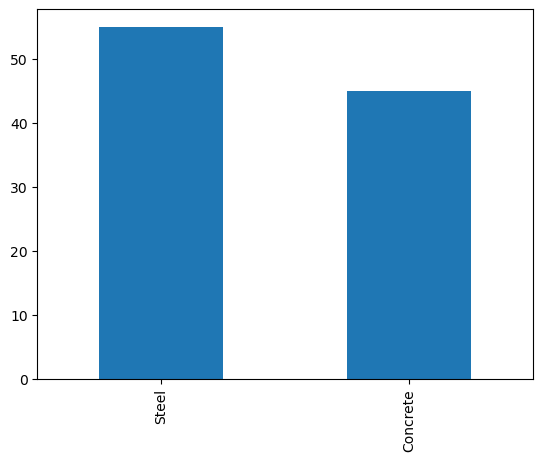

In [22]:
df['Pile Material'].value_counts().plot(kind='bar')

In [15]:
sdf = df[df['Pile Material'] == 'Steel'].copy()
cdf = df[df['Pile Material'] == 'Concrete'].copy()

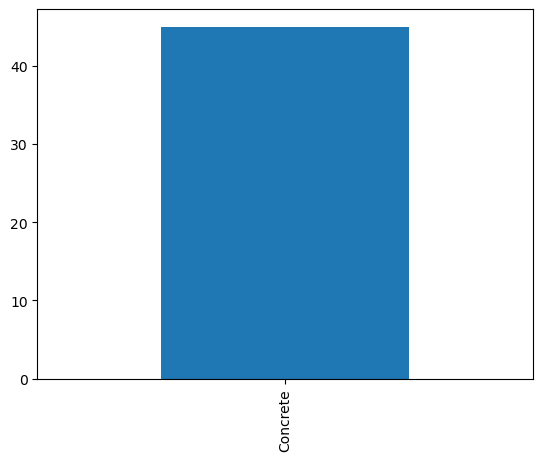

In [16]:
cdf['Pile Material'].value_counts().plot(kind='bar');


# For Steel

In [17]:
sdf.head()

,Pile Material,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m),Pile Capacity (kN)
0,Steel,33.0,28.85,9.82,12.49,20.1,0.1,19.5,1040.0
1,Steel,33.0,29.89,9.73,12.41,27.0,0.1,23.5,1400.0
2,Steel,33.0,28.81,9.82,12.49,20.0,0.1,19.4,990.0
3,Steel,0.0,28.00,9.57,12.27,21.0,0.1,19.5,960.0
4,Steel,0.0,28.00,9.69,12.22,24.0,0.1,23.5,1330.0


In [18]:
sdf.isna().sum()

Pile Material                           0
Average Cohesion (kN/m2)                0
Average Friction angle (°)              0
Average soil Specific weight (kN/m3)    0
Average Pile-Soil friction angle (°)    0
Flap Number                             0
Pile Area (m2)                          0
Pile Length (m)                         0
Pile Capacity (kN)                      0
dtype: int64

In [19]:
sdf.shape

(55, 9)

In [20]:
X = sdf.drop(['Pile Material', 'Pile Capacity (kN)'], axis=1)
y = sdf['Pile Capacity (kN)']

In [21]:
X.head(2)

,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m)
0,33.0,28.85,9.82,12.49,20.1,0.1,19.5
1,33.0,29.89,9.73,12.41,27.0,0.1,23.5


In [35]:
y.head(2)

0    1040.0
1    1400.0
Name: Pile Capacity (kN), dtype: float64

In [22]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR



from sklearn.model_selection import train_test_split

# # Set data
# X = sdf.drop(['Pile Material', 'Pile Capacity (kN)'], axis=1)
# y = sdf['Pile Capacity (kN)']
# # Split the data into training and testing sets

# np.random.seed(71)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# len(X_train), len(X_test), len(y_train), len(y_test)

(44, 11, 44, 11)

In [41]:
sdf=sdf.drop(['Pile Material'],axis=1)

In [42]:
from sklearn.model_selection import train_test_split
ys=sdf['Pile Capacity (kN)']

In [71]:
Xs=sdf.drop(['Pile Capacity (kN)'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(Xs,ys,train_size=0.8,test_size=0.2)

In [72]:
X_train.head()

,Average Cohesion (kN/m2),Average Friction angle (°),Average soil Specific weight (kN/m3),Average Pile-Soil friction angle (°),Flap Number,Pile Area (m2),Pile Length (m)
63,49.80,31.01,11.20,12.47,990.0,1.16,22.5
49,45.80,31.11,11.23,10.14,406.0,0.78,20.5
50,49.80,31.01,11.20,12.47,670.0,1.16,22.5
29,7.83,36.56,13.49,17.00,29.0,0.07,14.2
59,41.10,31.23,11.25,12.78,1610.0,1.16,18.5


## RandomForestRegressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,max_leaf_nodes=40,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(max_leaf_nodes=40, n_estimators=1000, random_state=42)

In [94]:
model.score(X_test, y_test)

0.8988876328309802

In [75]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)
print(np.array(y_test))

[ 2354.236   2275.149   4308.769   2533.89    3418.4975  2848.1925
 38182.016   4243.385   2035.604   8167.0845 27822.8   ]
[ 1030.  1830.  3565.  2595.  1300.  2575. 52100.  4100.  1230.  1330.
 24900.]


In [76]:
show_scores(model)

{'training MAE': 848.0621250000003,
 'test MAE': 2690.2555909090906,
 'training MAPE': 0.2994010580318685,
 'test MAPE': 0.8829023080435136,
 'training MSE': 2847898.2577861873,
 'test MSE': 23339970.105487064,
 'Training R^2': 0.9755752015449298,
 'Valid R^2': 0.8988876328309802}

In [66]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        'training MAE': mean_absolute_error(y_train, train_preds),
        'test MAE': mean_absolute_error(y_test, test_preds),
        
        'training MAPE': mean_absolute_percentage_error(y_train, train_preds),
        'test MAPE': mean_absolute_percentage_error(y_test, test_preds),
        
        'training MSE': mean_squared_error(y_train, train_preds),
        'test MSE': mean_squared_error(y_test, test_preds),
        
        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_test, test_preds)
    }
    return scores

In [67]:
def difference(model):
    prbdf = pd.DataFrame({
        'Prediction': model.predict(X_test),
        'True': np.array(y_test)
    })
    prbdf.plot(kind='bar', figsize = (10, 5))

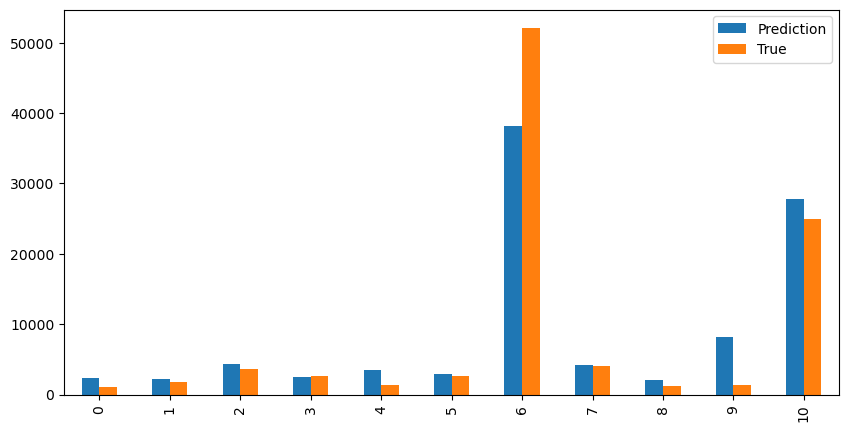

In [77]:
difference(model)

## Linear Regression

In [79]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = lr.predict(X_test)
print(y_pred)
print(np.array(y_test))

[-4227.11163357  5626.88366684  4960.1978872   2487.63850137
  5500.14803271 -1639.92263546 43322.5622903   5099.82855509
 -7054.32481929  4680.81806497 33344.63212759]
[ 1030.  1830.  3565.  2595.  1300.  2575. 52100.  4100.  1230.  1330.
 24900.]


In [81]:
show_scores(lr)

{'training MAE': 2344.7304771812414,
 'test MAE': 4438.9696937322415,
 'training MAPE': 0.972752303310985,
 'test MAPE': 2.0441255579077473,
 'training MSE': 10715316.712866895,
 'test MSE': 28057397.21239562,
 'Training R^2': 0.9081008423041534,
 'Valid R^2': 0.8784510076094814}

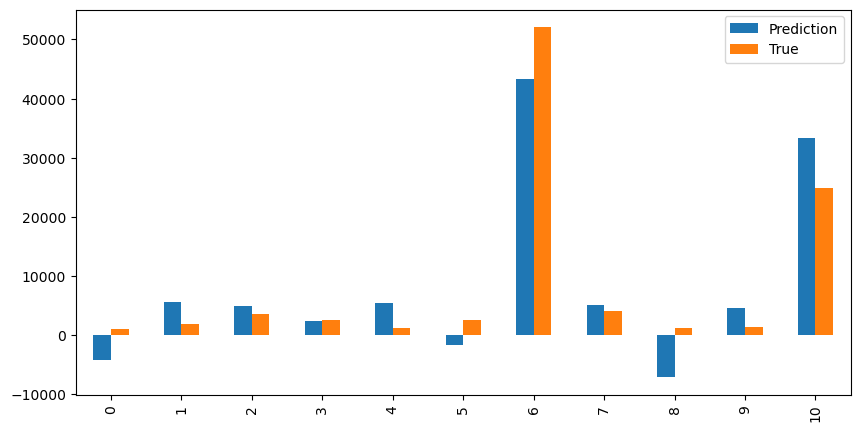

In [82]:
difference(lr)

## XGBoostRegressor

In [83]:
# Create and fit the XGBoost regression model
xr = xgb.XGBRegressor()
xr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
y_pred = xr.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(xr)

[ 2593.5723  1306.9963  4071.8647  1607.1643  2750.6787  2355.2688
 39592.355   4394.646   1034.5344  1216.9426 36486.863 ]
[ 1030.  1830.  3565.  2595.  1300.  2575. 52100.  4100.  1230.  1330.
 24900.]


{'training MAE': 0.006497469815340909,
 'test MAE': 2722.669367009943,
 'training MAPE': 2.2472744851639307e-06,
 'test MAPE': 0.4135548312252189,
 'training MSE': 7.577291266484694e-05,
 'test MSE': 26994377.295820437,
 'Training R^2': 0.9999999999993502,
 'Valid R^2': 0.8830561746095651}

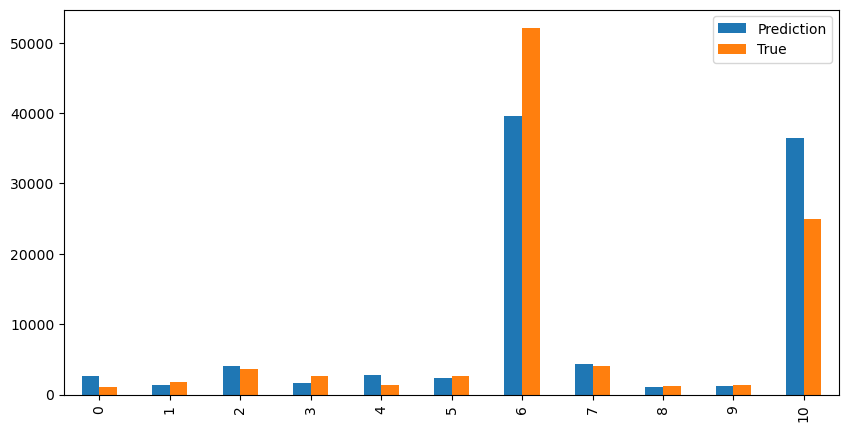

In [85]:
difference(xr)

## CatBoostRegressor

In [86]:
# Loading the BERT Classifier and Tokenizer along with Input module

from IPython.display import clear_output
cr = CatBoostRegressor();
cr.fit(X_train, y_train);
clear_output()

In [87]:
y_pred = cr.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(cr)

[ 1302.77110078  2876.77183487  4448.79409552  2466.22613677
  2414.45208097  2403.84519479 28555.24420413  4289.58581989
  2541.70239646  2546.48713179 23262.81922491]
[ 1030.  1830.  3565.  2595.  1300.  2575. 52100.  4100.  1230.  1330.
 24900.]


{'training MAE': 33.597605162349424,
 'test MAE': 2865.2208817891606,
 'training MAPE': 0.010750683621105518,
 'test MAPE': 0.418462362085528,
 'training MSE': 1902.2165107397573,
 'test MSE': 51228303.70421879,
 'Training R^2': 0.9999836857743195,
 'Valid R^2': 0.7780710502123012}

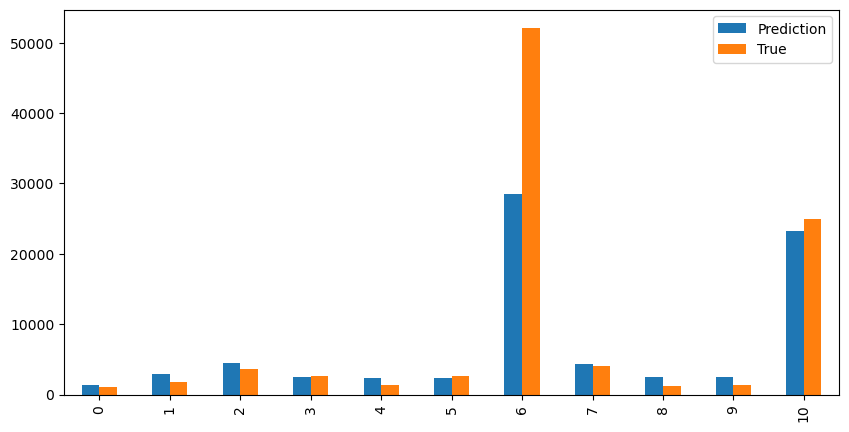

In [88]:
difference(cr)

## SupportVectorRegressor

In [95]:
# Create and fit the SVR model
models= SVR()
models.fit(X_train, y_train)

SVR()

In [96]:
y_pred = models.predict(X_test)
print(y_pred)
print(np.array(y_test))
show_scores(models)

[3564.7509803  3564.7251783  3583.03395155 3566.77214728 3564.79008325
 3565.73216184 3579.82709351 3581.92304353 3564.69495849 3564.62679705
 3572.3849065 ]
[ 1030.  1830.  3565.  2595.  1300.  2575. 52100.  4100.  1230.  1330.
 24900.]


{'training MAE': 4243.236568723785,
 'test MAE': 7586.362837682714,
 'training MAPE': 0.6582385013483889,
 'test MAPE': 1.037070105900817,
 'training MSE': 125150834.94138317,
 'test MSE': 257843348.20907936,
 'Training R^2': -0.07334730500633624,
 'Valid R^2': -0.11701733885583354}

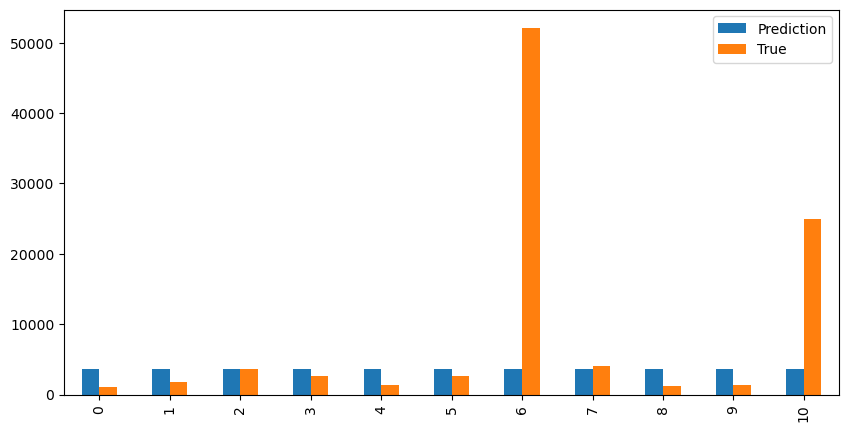

In [91]:
difference(model)

## Differentiate between best model

In [155]:
def shy(model):
    test_preds = model.predict(X_test)
    scores = {
        'R^2': r2_score(y_test, test_preds),
        'MAE': mean_absolute_error(y_test, test_preds),
        'MAPE': mean_absolute_percentage_error(y_test, test_preds)
        
    }
    return scores

In [156]:
shy(model)

{'R^2': 0.8988876328309802,
 'MAE': 2690.2555909090906,
 'MAPE': 0.8829023080435136}

In [157]:
cmp = pd.DataFrame({
    'RFRegressor': shy(model),
    'LinearRegression': shy(lr),
    'XGBRegressor': shy(xr),
    'CatBoostRegressor': shy(cr),
    'SVRegressor': shy(models)
})

In [158]:
cmp

,RFRegressor,LinearRegression,XGBRegressor,CatBoostRegressor,SVRegressor
R^2,0.898888,0.878451,0.883056,0.778071,-0.117017
MAE,2690.255591,4438.969694,2722.669367,2865.220882,7586.362838
MAPE,0.882902,2.044126,0.413555,0.418462,1.037070


In [165]:
colors = ['red', 'green', 'blue', 'yellow', 'violet']
colors

['red', 'green', 'blue', 'yellow', 'violet']

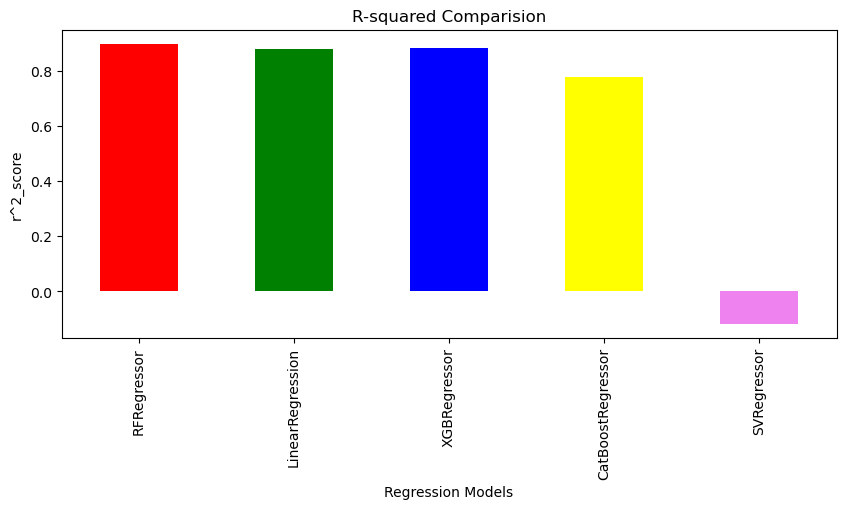

In [172]:
cmp.iloc[0].plot(kind='bar', figsize=(10,4), color=colors, title='R-squared Comparision')
plt.xlabel('Regression Models')
plt.ylabel('r^2_score')
plt.show()

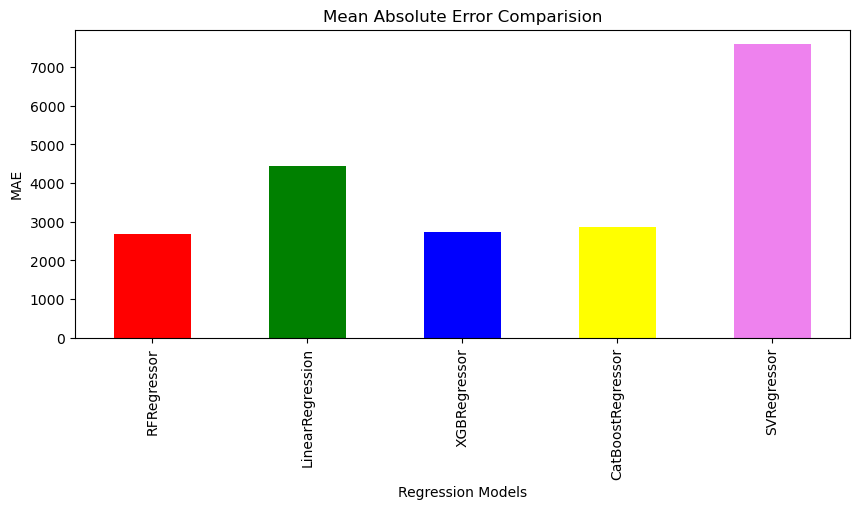

In [173]:
cmp.iloc[1].plot(kind='bar', figsize=(10,4), color=colors, title='Mean Absolute Error Comparision')
plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.show()

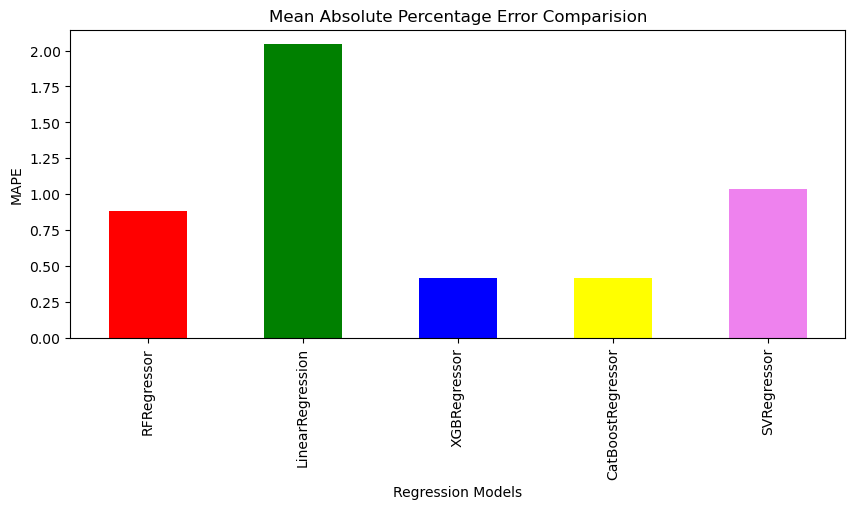

In [175]:
cmp.iloc[2].plot(kind='bar', figsize=(10,4), color=colors, title='Mean Absolute Percentage Error Comparision')
plt.xlabel('Regression Models')
plt.ylabel('MAPE')
plt.show()

author:Tanbeer Jubaer Oitik

## Cross Val Score  -->

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def check_cv(model):
    # Perform cross-validation and get the R-squared scores
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Cross-Validation R-squared scores:", scores)
    print("Average R-squared score:", scores.mean())
    return scores

## rfc

In [178]:
check_cv(model)

Cross-Validation R-squared scores: [   0.52939434    0.96177044 -227.66531289   -0.64994606   -1.10617716]
Average R-squared score: -45.58605426485229


## LInear Regression

In [179]:
check_cv(lr)

Cross-Validation R-squared scores: [   0.91805658    0.79332134 -253.11427036   -8.04138242  -13.03067594]
Average R-squared score: -54.49499015730487


## XGBReg..

In [182]:
check_cv(xr)

Cross-Validation R-squared scores: [  -0.81447186    0.97965329 -178.64781989    0.21139083   -6.07444948]
Average R-squared score: -36.869139422362544


## CatBoost

In [189]:
ans = check_cv(cr)
clear_output()

In [190]:
print(ans)

[  0.76438822   0.93064912 -85.31208369   0.09687024  -0.57444934]
